In [39]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [40]:
import pandas as pd
from newGraphDiscovery import GraphDiscoveryNew
import numpy as onp
import matplotlib.pyplot as plt
from tqdm import tqdm
import networkx as nx
from sklearn.preprocessing import StandardScaler

In [41]:
df=pd.read_csv("churn.csv",index_col=0)
df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1


In [42]:
index_to_geography=list(set(df['Geography']))
geography_to_index={name:k for k,name in enumerate(index_to_geography)}
df['Geography']=df['Geography'].apply(lambda name:geography_to_index[name])
index_to_gender=list(set(df['Gender']))
gender_to_index={name:k for k,name in enumerate(index_to_gender)}
df['Gender']=df['Gender'].apply(lambda name:gender_to_index[name])
df=df.drop(['Surname','Geography'],axis=1)
node_names=df.columns
df

,CustomerId,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
1,15634602,619,0,42,2,0.00,1,1,1,101348.88,1
2,15647311,608,0,41,1,83807.86,1,0,1,112542.58,0
3,15619304,502,0,42,8,159660.80,3,1,0,113931.57,1
4,15701354,699,0,39,1,0.00,2,0,0,93826.63,0
5,15737888,850,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9996,15606229,771,1,39,5,0.00,2,1,0,96270.64,0
9997,15569892,516,1,35,10,57369.61,1,1,1,101699.77,0
9998,15584532,709,0,36,7,0.00,1,0,1,42085.58,1


In [43]:
X=df.sample(1000).to_numpy()
X=(X-onp.mean(X,axis=0))/onp.std(X,axis=0)
X

array([[ 1.32930258, -0.62999859,  0.90088523, ..., -1.05765971,
        -0.2150958 , -0.47643873],
       [-1.53779308,  0.41260108,  0.90088523, ..., -1.05765971,
         1.68651364, -0.47643873],
       [ 1.11575543,  0.30937339,  0.90088523, ..., -1.05765971,
         1.66059625, -0.47643873],
       ...,
       [ 0.51422117, -1.78614872, -1.1100193 , ..., -1.05765971,
         1.45125964, -0.47643873],
       [ 1.6714871 ,  1.04228999,  0.90088523, ..., -1.05765971,
        -0.52317818, -0.47643873],
       [-0.88084197, -0.34096106,  0.90088523, ...,  0.94548368,
         1.18136998, -0.47643873]])

In [44]:
df

,CustomerId,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
1,15634602,619,0,42,2,0.00,1,1,1,101348.88,1
2,15647311,608,0,41,1,83807.86,1,0,1,112542.58,0
3,15619304,502,0,42,8,159660.80,3,1,0,113931.57,1
4,15701354,699,0,39,1,0.00,2,0,0,93826.63,0
5,15737888,850,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9996,15606229,771,1,39,5,0.00,2,1,0,96270.64,0
9997,15569892,516,1,35,10,57369.61,1,1,1,101699.77,0
9998,15584532,709,0,36,7,0.00,1,0,1,42085.58,1


In [45]:
beta=onp.array([0.1,0.01,0.001])
graph_discovery=GraphDiscoveryNew(X.T,beta,onp.array(node_names),l=1)

Computing kernel matrix


In [46]:

def acceptation(noise,Z,which):
    if which=='gaussian':
        return abs(Z)>1.96
    if noise<0.40:
        return True
    
    return False

inspecting CustomerId
linear kernel (using gamma=5.00e-02)
 n/(n+s)=1.00, Z=-2.42
decision : refused
quadratic kernel (using gamma=5.00e-02)
 n/(n+s)=1.00, Z=-0.40
decision : refused
gaussian kernel (using gamma=5.00e-02)
 n/(n+s)=0.48, Z=-0.15
decision : refused
CustomerId has no ancestors (n/(s+n)=0.48)



inspecting CreditScore
linear kernel (using gamma=5.00e-02)
 n/(n+s)=1.00, Z=-0.07
decision : refused
quadratic kernel (using gamma=5.00e-02)
 n/(n+s)=1.00, Z=0.26
decision : refused
gaussian kernel (using gamma=5.00e-02)
 n/(n+s)=0.48, Z=-0.09
decision : refused
CreditScore has no ancestors (n/(s+n)=0.48)



inspecting Gender
linear kernel (using gamma=5.00e-02)
 n/(n+s)=1.00, Z=-3.77
decision : refused
quadratic kernel (using gamma=5.00e-02)
 n/(n+s)=1.00, Z=-1.26
decision : refused
gaussian kernel (using gamma=5.00e-02)
 n/(n+s)=0.42, Z=0.54
decision : refused
Gender has no ancestors (n/(s+n)=0.42)



inspecting Age
linear kernel (using gamma=5.00e-02)
 n/(n+s)=1.00, Z=-16.65
de

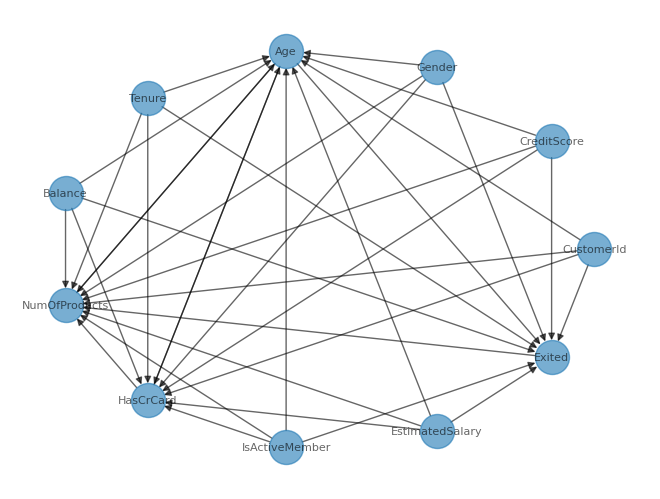

In [47]:
for node in graph_discovery.names:
    print(f'inspecting {node}')
    graph_discovery.find_ancestors(node,gamma=5e-2,kPCA='no',acceptation_logic=acceptation)
    print('\n')
graph_discovery.plot_graph()